In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.facecolor'] = 'bisque'

# FO

### Data collection:-

<b>----26 July</b> 

From SRStockAlertBot (Free channel)

<b>----30 Sept</b>

From SRStockAlertBot_FnO (Paid channel)    +    4 alerts from SRStockAlertBot (not present in SRStockAlertBot_FnO)

<b>----31 Jan</b>

In [3]:
dfcf = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/Clean/FnO.xlsx')

In [4]:
# total alerts
dfcf.shape

(404, 14)

In [5]:
# Total bullish alerts
dfcf[dfcf.Type=='Bullish'].shape[0]

315

In [6]:
#Total bearish alerts
dfcf[dfcf.Type=='Bearish'].shape[0]

89

In [7]:
#Total stagnant alerts
dfcf[dfcf.Result=='STAGNANT'].shape[0]

12

In [8]:
dfcf[dfcf.Result=='STAGNANT'].Type.value_counts()

Bullish    10
Bearish     2
Name: Type, dtype: int64

#### removing OPEN alerts

In [9]:
ons = dfcf[dfcf.Result=='ON'].index # Identify OPEN/ON alerts
len(ons), ons # all from will be from current month

(4, Int64Index([0, 1, 5, 9], dtype='int64'))

In [10]:
dfcf.iloc[ons, :].Type.value_counts()

Bullish    3
Bearish    1
Name: Type, dtype: int64

In [11]:
dfcf.drop(ons, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcf.shape

(400, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [12]:
# Total Target achieved and SL Hit alerts
TA = dfcf[dfcf['result dummy']=='Target achieved'].shape[0]
SL = dfcf[dfcf['result dummy']=='SL Hit'].shape[0]
TA, SL

(280, 108)

In [13]:
# Total stagnant alerts
dfcf[dfcf['result dummy']=='STAGNANT'].shape[0]

12

In [14]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]
p1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]

n2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]
p2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 12)

In [15]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(280.0, 114.0)

In [16]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.07, 'SL Hit': 28.93}

Text(0, 0.5, '%')

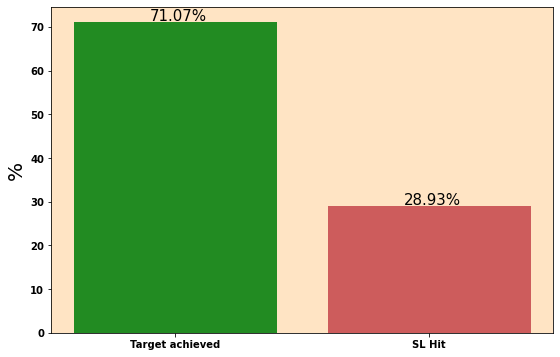

In [17]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

Text(0, 0.5, '%')

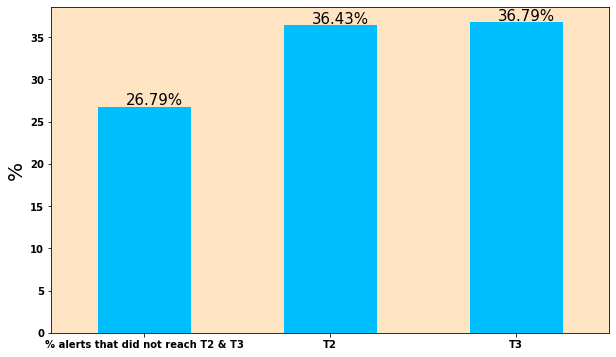

In [18]:
TAstat = dfcf[dfcf.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [19]:
# Avg no. of days needed to reach the highest target
dfcf[dfcf['result dummy']=='Target achieved'].NoD.mean()

5.860714285714286

### STAGNANT alert chart

In [20]:
stag = {}
for index, row in dfcf[dfcf['result dummy']=='STAGNANT'].iterrows():
    change = (row['15DayClose']-row['Price'])/row['Price'] * 100
    if row['Type'] == 'Bullish':
        if change>0:
            c = 'limegreen'
        else:
            c = 'tomato'
    else:
        if change<0:
            c= 'limegreen'
        else:
            c = 'tomato'
    
    stag[change] = (row['Stock'][:-3], row['Type'], c)

In [21]:
# preparing x-ticks
stag_date = dfcf[dfcf['result dummy']=='STAGNANT'].Date
dates = [date.strftime('%d %b') for date in stag_date]
dates[6] = '27 Sept'                      # For seperating out label on x-axis
dates

['14 Dec',
 '02 Nov',
 '26 Oct',
 '14 Oct',
 '11 Oct',
 '06 Oct',
 '27 Sept',
 '27 Sep',
 '16 Sep',
 '08 Sep',
 '06 Sep',
 '11 Aug']

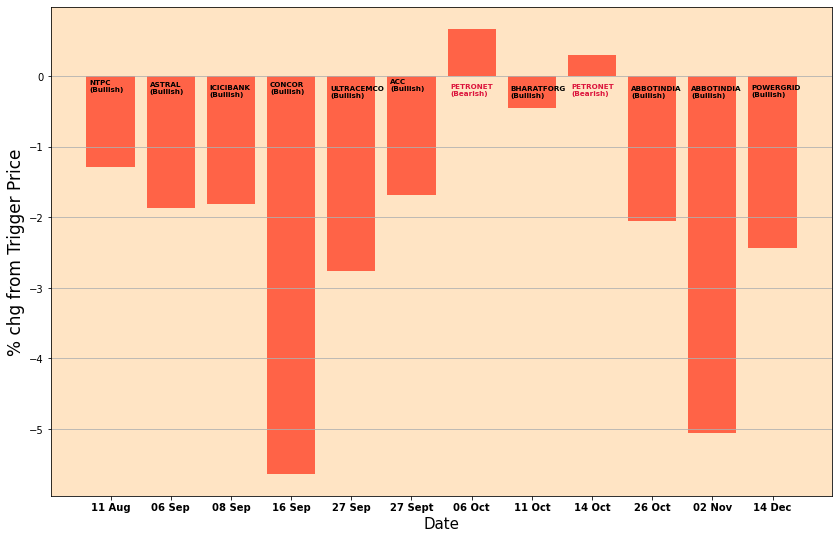

In [22]:
# STAGNANT chart
plt.figure(figsize=(14,9))
plt.bar(x= dates[::-1],
        height= list(stag.keys())[::-1],
        color = np.array(list(stag.values()))[:, -1][::-1])

for i,j in enumerate(list(stag.keys())[::-1]):
    text = f'{stag[j][0]}\n({stag[j][1]})'
    if stag[j][1]=='Bullish':
        c = 'black'
    else:
        c = 'crimson'

    plt.annotate(s=text, xy=(i-0.35, 0-len(text)*0.015), xycoords='data', fontsize=7.2, color=c, fontweight='bold')

plt.xticks(fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('% chg from Trigger Price', fontsize=17)
plt.grid(axis='y')

### Bullish v/s Bearish alerts

#### Bullish

In [23]:
# Total bullish alerts
bull = dfcf[dfcf.Type=='Bullish']
bull.shape # In actual, 315, +3 that were removed as ON alerts

(312, 14)

In [24]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(218, 84)

In [25]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

10

In [26]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(0, 10)

In [27]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(218.0, 89.0)

In [28]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.01, 'SL Hit': 28.99}

Text(0, 0.5, '%')

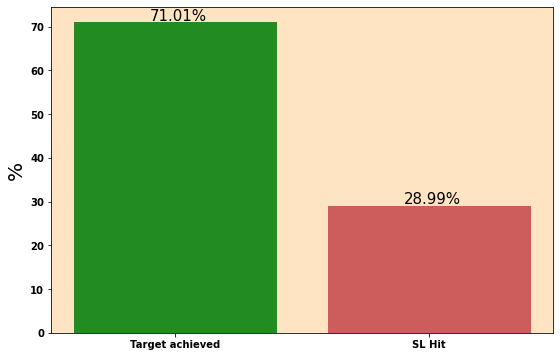

In [29]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [30]:
# Total bearish alerts
bear = dfcf[dfcf.Type=='Bearish']
bear.shape # In actual 89, +1 that were removed as ON alerts

(88, 14)

In [31]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(62, 24)

In [32]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [33]:
# (+)ive & (-)ive STAGNANT alerts in bear df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [34]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(62.0, 25.0)

In [35]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.26, 'SL Hit': 28.74}

Text(0, 0.5, '%')

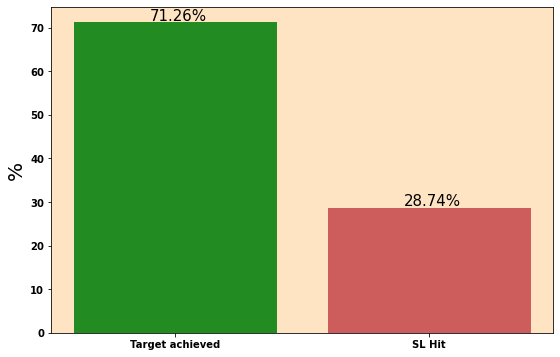

In [36]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [37]:
dfm = dfcf.set_index('Date')

### July

#### Target achieved v/s SL Hit chart

In [38]:
# Total alerts in july
july = dfm.loc['2021-07-01':'2021-07-31']
july.shape

<ipython-input-38-854eef3c5dbe>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  july = dfm.loc['2021-07-01':'2021-07-31']


(21, 13)

In [39]:
# Total Target achieved and SL Hit alerts in july
TA = july[july['result dummy']=='Target achieved'].shape[0]
SL = july[july['result dummy']=='SL Hit'].shape[0]
TA, SL
# Therefore no STAGNANT alerts

(17, 4)

In [40]:
julystat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
julystat

{'Target achieved': 80.95, 'SL Hit': 19.05}

Text(0, 0.5, '%')

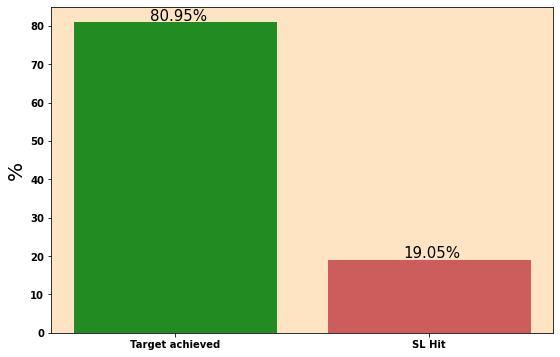

In [41]:
plt.figure(figsize=(9,6))
plt.bar(julystat.keys(), julystat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(julystat):
    plt.annotate(f"{julystat[j]}%", xy=(i-0.1, julystat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

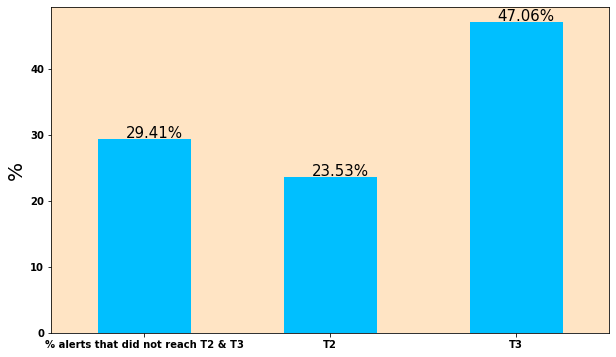

In [42]:
TAstat = july[july.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [43]:
julyTAstat = TAstat

### August

In [44]:
# Total alerts in august
aug = dfm.loc['2021-08-01':'2021-08-31']
aug.shape

<ipython-input-44-9ad5d03b3694>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  aug = dfm.loc['2021-08-01':'2021-08-31']


(81, 13)

#### Target achieved v/s SL Hit chart

In [45]:
# Total Target achieved and SL Hit alerts in august
TA = aug[aug['result dummy']=='Target achieved'].shape[0]
SL = aug[aug['result dummy']=='SL Hit'].shape[0]
TA, SL

(55, 25)

In [46]:
# Total stagnant alerts in august
aug[aug['result dummy']=='STAGNANT'].shape[0]

1

In [47]:
# (+)ive & (-)ive STAGNANT alerts
n1 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bullish') & (aug['15DayClose']<aug.Price)].shape[0]
p1 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bullish') & (aug['15DayClose']>aug.Price)].shape[0]

n2 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bearish') & (aug['15DayClose']>aug.Price)].shape[0]
p2 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bearish') & (aug['15DayClose']<aug.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [48]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(55.0, 25.5)

In [49]:
augstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
augstat

{'Target achieved': 68.32, 'SL Hit': 31.68}

Text(0, 0.5, '%')

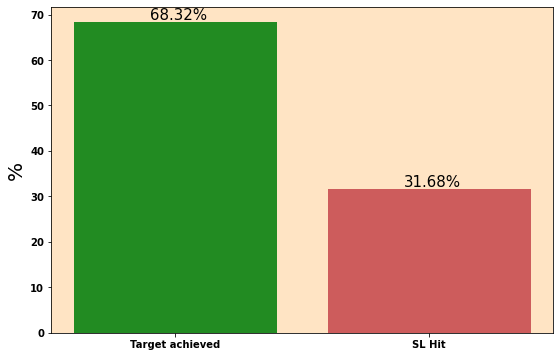

In [50]:
plt.figure(figsize=(9,6))
plt.bar(augstat.keys(), augstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(augstat):
    plt.annotate(f"{augstat[j]}%", xy=(i-0.1, augstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

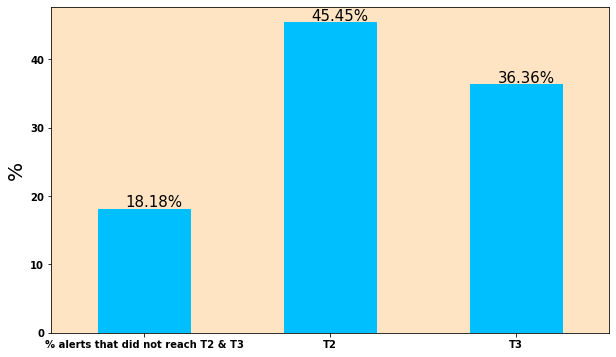

In [51]:
TAstat = aug[aug.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [52]:
augTAstat = TAstat

### September

In [53]:
# Total alerts in sept
sept = dfm.loc['2021-09-01':'2021-09-30']
sept.shape

(67, 13)

#### Target achieved v/s SL Hit chart

In [54]:
# Total Target achieved and SL Hit alerts in sept
TA = sept[sept['result dummy']=='Target achieved'].shape[0]
SL = sept[sept['result dummy']=='SL Hit'].shape[0]
TA, SL

(45, 17)

In [55]:
# Total stagnant alerts in sept
sept[sept['result dummy']=='STAGNANT'].shape[0]

5

In [56]:
# (+)ive & (-)ive STAGNANT alerts
n1 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bullish') & (sept['15DayClose']<sept.Price)].shape[0]
p1 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bullish') & (sept['15DayClose']>sept.Price)].shape[0]

n2 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bearish') & (sept['15DayClose']>sept.Price)].shape[0]
p2 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bearish') & (sept['15DayClose']<sept.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 5)

In [57]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(45.0, 19.5)

In [58]:
septstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
septstat

{'Target achieved': 69.77, 'SL Hit': 30.23}

Text(0, 0.5, '%')

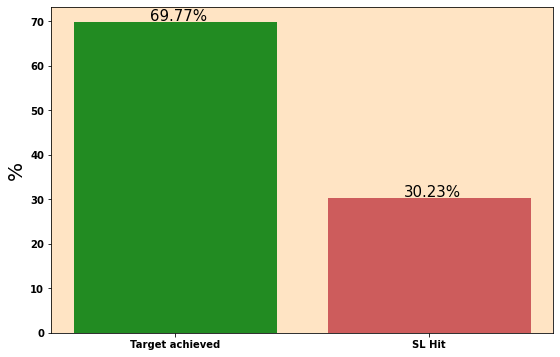

In [59]:
plt.figure(figsize=(9,6))
plt.bar(septstat.keys(), septstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(septstat):
    plt.annotate(f"{septstat[j]}%", xy=(i-0.1, septstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

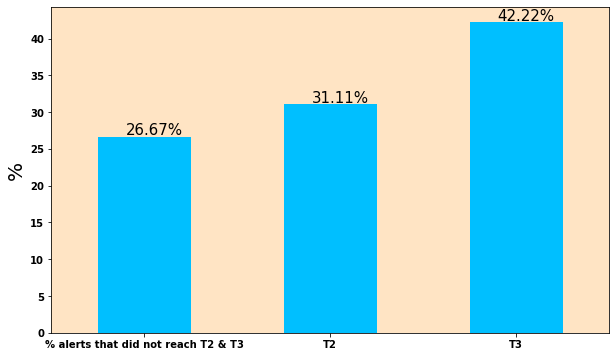

In [60]:
TAstat = sept[sept.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [61]:
septTAstat = TAstat

### October

In [62]:
# Total alerts in sept
Oct = dfm.loc['2021-10-01':'2021-10-31']
Oct.shape

(114, 13)

#### Target achieved v/s SL Hit chart

In [63]:
# Total Target achieved and SL Hit alerts in august
TA = Oct[Oct['result dummy']=='Target achieved'].shape[0]
SL = Oct[Oct['result dummy']=='SL Hit'].shape[0]
TA, SL

(76, 34)

In [64]:
# Total stagnant alerts in august
Oct[Oct['result dummy']=='STAGNANT'].shape[0]

4

In [65]:
# (+)ive & (-)ive STAGNANT alerts
n1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']<Oct.Price)].shape[0]
p1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']>Oct.Price)].shape[0]

n2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']>Oct.Price)].shape[0]
p2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']<Oct.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 4)

In [66]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(76.0, 36.0)

In [67]:
octstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
octstat

{'Target achieved': 67.86, 'SL Hit': 32.14}

Text(0, 0.5, '%')

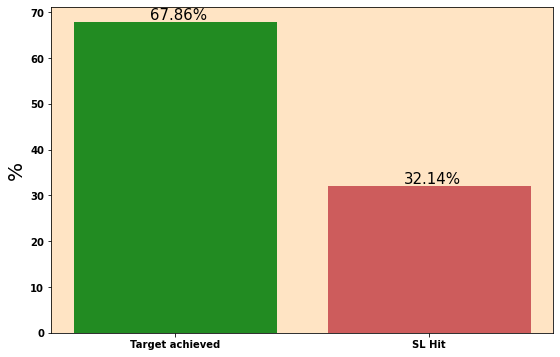

In [68]:
plt.figure(figsize=(9,6))
plt.bar(octstat.keys(), octstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(octstat):
    plt.annotate(f"{octstat[j]}%", xy=(i-0.1, octstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

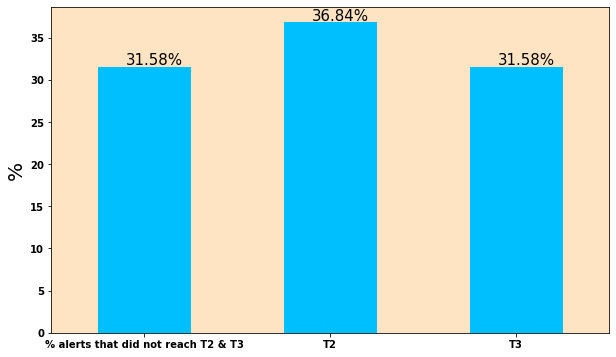

In [69]:
TAstat = Oct[Oct.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [70]:
octTAstat = TAstat

### November

In [71]:
# Total alerts in november
nov = dfm.loc['2021-11-01':'2021-11-30']
nov.shape

(57, 13)

#### Target achieved v/s SL Hit chart

In [72]:
# Total Target achieved and SL Hit alerts in november
TA = nov[nov['result dummy']=='Target achieved'].shape[0]
SL = nov[nov['result dummy']=='SL Hit'].shape[0]
TA, SL

(43, 13)

In [73]:
# Total stagnant alerts in novemebr
nov[nov['result dummy']=='STAGNANT'].shape[0]

1

In [74]:
# (+)ive & (-)ive STAGNANT alerts
n1 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bullish') & (nov['15DayClose']<nov.Price)].shape[0]
p1 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bullish') & (nov['15DayClose']>nov.Price)].shape[0]

n2 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bearish') & (nov['15DayClose']>nov.Price)].shape[0]
p2 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bearish') & (nov['15DayClose']<nov.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [75]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(43.0, 13.5)

In [76]:
novstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
novstat

{'Target achieved': 76.11, 'SL Hit': 23.89}

Text(0, 0.5, '%')

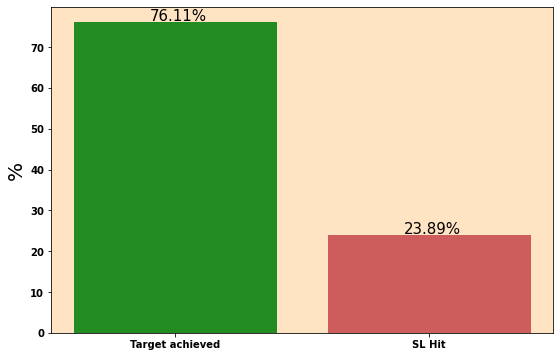

In [77]:
plt.figure(figsize=(9,6))
plt.bar(novstat.keys(), novstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(novstat):
    plt.annotate(f"{novstat[j]}%", xy=(i-0.1, novstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

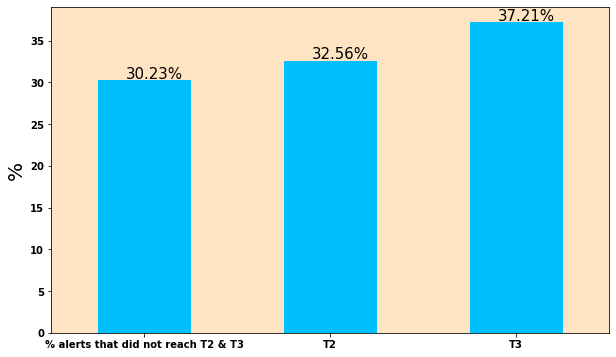

In [78]:
TAstat = nov[nov.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [79]:
novTAstat = TAstat

### Dec

In [80]:
dec = dfm.loc['2021-12-01':'2021-12-31']
dec.shape 

(40, 13)

#### Target achieved v/s SL Hit chart

In [81]:
# Total Target achieved and SL Hit alerts in dec
TA = dec[dec['result dummy']=='Target achieved'].shape[0]
SL = dec[dec['result dummy']=='SL Hit'].shape[0]
TA, SL

(31, 8)

In [82]:
# Total stagnant alerts in dec
dec[dec['result dummy']=='STAGNANT'].shape[0]

1

In [83]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bullish') & (dec['15DayClose']<dec.Price)].shape[0]
p1 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bullish') & (dec['15DayClose']>dec.Price)].shape[0]

n2 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bearish') & (dec['15DayClose']>dec.Price)].shape[0]
p2 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bearish') & (dec['15DayClose']<dec.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [84]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(31.0, 8.5)

In [85]:
decstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
decstat

{'Target achieved': 78.48, 'SL Hit': 21.52}

Text(0, 0.5, '%')

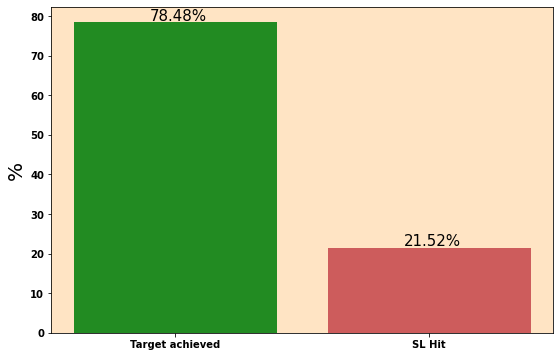

In [86]:
plt.figure(figsize=(9,6))
plt.bar(decstat.keys(), decstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(decstat):
    plt.annotate(f"{decstat[j]}%", xy=(i-0.1, decstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

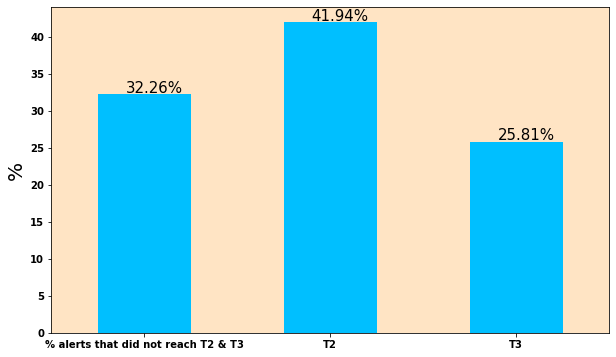

In [87]:
TAstat = dec[dec.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [88]:
decTAstat = TAstat

### Jan

In [89]:
# Total alerts in jan
jan = dfm.loc['2022-01-01':'2022-01-31']
jan.shape # In actual 24, +4 removed as ON alerts

<ipython-input-89-c2cd68c8600e>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  jan = dfm.loc['2022-01-01':'2022-01-31']


(20, 13)

#### Target achieved v/s SL Hit chart

In [90]:
# Total Target achieved and SL Hit alerts in jan
TA = jan[jan['result dummy']=='Target achieved'].shape[0]
SL = jan[jan['result dummy']=='SL Hit'].shape[0]
TA, SL

(13, 7)

In [91]:
# Total stagnant alerts in jan
jan[jan['result dummy']=='STAGNANT'].shape[0]

0

In [92]:
# (+)ive & (-)ive STAGNANT alerts
n1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']<jan.Price)].shape[0]
p1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']>jan.Price)].shape[0]

n2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']>jan.Price)].shape[0]
p2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']<jan.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 0)

In [93]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(13.0, 7.0)

In [94]:
janstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
janstat

{'Target achieved': 65.0, 'SL Hit': 35.0}

Text(0, 0.5, '%')

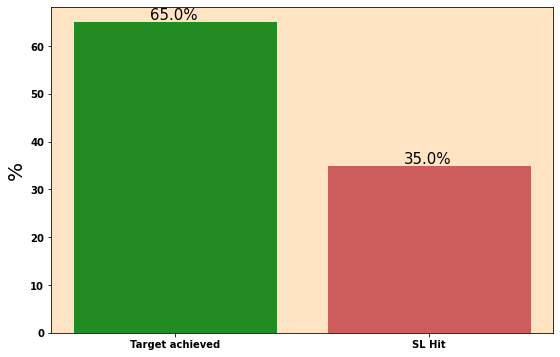

In [95]:
plt.figure(figsize=(9,6))
plt.bar(janstat.keys(), janstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(janstat):
    plt.annotate(f"{janstat[j]}%", xy=(i-0.1, janstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

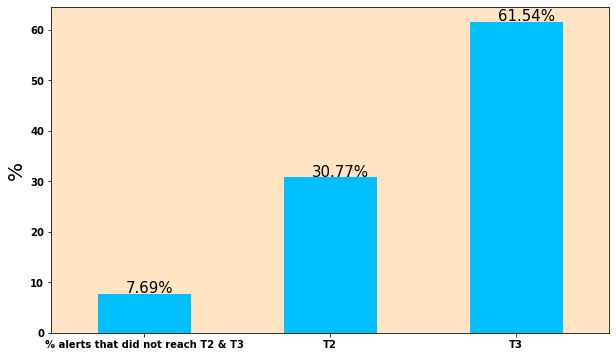

In [96]:
TAstat = jan[jan.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3','T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [97]:
janTAstat = TAstat

### Line chart

In [98]:
line_data = list(zip(julystat.values(), augstat.values(), septstat.values(), octstat.values(), novstat.values(), decstat.values(), janstat.values()))

In [99]:
mo_alerts = [july.shape[0], aug.shape[0], sept.shape[0], Oct.shape[0], nov.shape[0], dec.shape[0], jan.shape[0]]
mo_alerts

[21, 81, 67, 114, 57, 40, 20]

In [100]:
months = ['july','aug','sept','oct','nov','dec', 'jan']

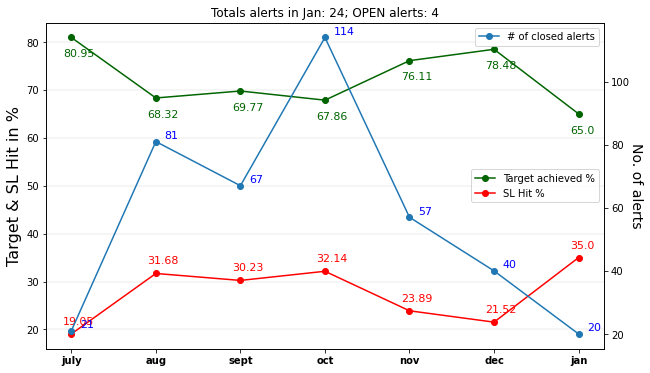

In [101]:
# Including month of july 
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
##ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in Jan: {jan.shape[0] + len(ons)}; OPEN alerts: {len(ons)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-4), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j+2), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, mo_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='upper right', facecolor='white')

for i,j in enumerate(mo_alerts):
    ax2.annotate(s=f'{j}', xy=(i+0.1, j+1), xycoords='data', fontsize=11, color='blue')

In [102]:
TAdata = [julyTAstat, augTAstat, septTAstat, octTAstat, novTAstat, decTAstat, janTAstat]

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

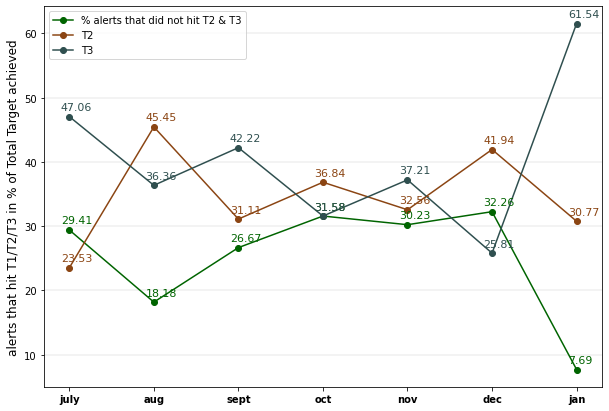

In [103]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_facecolor('white')

ax.plot(months, np.array(TAdata)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(TAdata)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(TAdata)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.3)
##ax.set_ylim(0, 100)

for i,j in enumerate(np.array(TAdata)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# NCASH

### Data collection:-

<b>----01 Oct</b> 

From SRStockAlertBot (Free channel)

<b>----31 Jan</b>

In [104]:
dfcn = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/Clean/NCASH.xlsx')
dfcn.shape

(55, 14)

In [105]:
# Total bullish alerts
dfcn[dfcn.Type=='Bullish'].shape[0]

55

In [106]:
#Total bearish alerts
dfcn[dfcn.Type=='Bearish'].shape[0]

0

In [107]:
#Total stagnant alerts
dfcn[dfcn.Result=='STAGNANT'].shape[0]

5

#### removing OPEN alerts

In [108]:
ons = dfcn[dfcn.Result=='ON'].index # Identify OPEN/ON alerts
len(ons), ons # all from current month

(0, Int64Index([], dtype='int64'))

In [109]:
dfcn.iloc[ons, :].Type.value_counts()

Series([], Name: Type, dtype: int64)

In [110]:
dfcn.drop(ons, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcn.shape

(55, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [111]:
5/55 * 100

9.090909090909092

In [112]:
# Total Target achieved and SL Hit alerts
TA = dfcn[dfcn['result dummy']=='Target achieved'].shape[0]
SL = dfcn[dfcn['result dummy']=='SL Hit'].shape[0]
TA, SL

(34, 16)

In [113]:
# Total stagnant alerts
dfcn[dfcn['result dummy']=='STAGNANT'].shape[0]

5

In [114]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]
p1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]

n2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]
p2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 3)

In [115]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(35.0, 17.5)

In [116]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 66.67, 'SL Hit': 33.33}

Text(0, 0.5, '%')

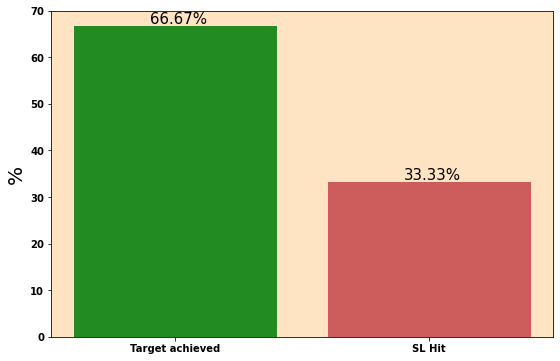

In [117]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

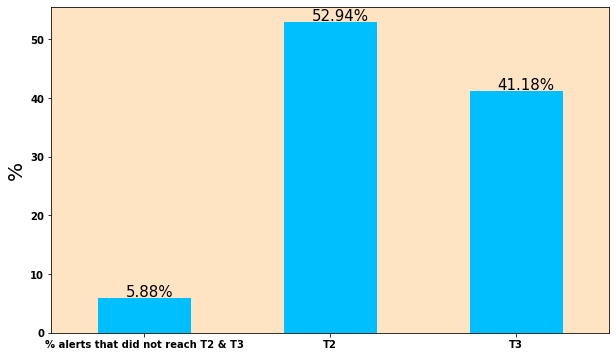

In [118]:
TAstat = dfcn[dfcn.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [119]:
# Avg no. of days needed to hit target
dfcn[dfcn.Result.isin(['T1','T2','T3'])].NoD.mean()

5.235294117647059

### STAGNANT alert chart

In [120]:
stag = {}
for index, row in dfcn[dfcn['result dummy']=='STAGNANT'].iterrows():
    change = round((row['15DayClose']-row['Price'])/row['Price'] * 100, 2)
    if row['Type'] == 'Bullish':
        if change>0:
            c = 'limegreen'
        else:
            c = 'tomato'
    else:
        if change<0:
            c= 'limegreen'
        else:
            c = 'tomato'
    
    stag[change] = (row['Stock'][:-3], row['Type'], c)

In [121]:
# preparing x-ticks
stag_date = dfcn[dfcn['result dummy']=='STAGNANT'].Date
dates = [date.strftime('%d %b') for date in stag_date]
dates

['10 Jan', '21 Oct', '20 Oct', '08 Oct', '07 Oct']

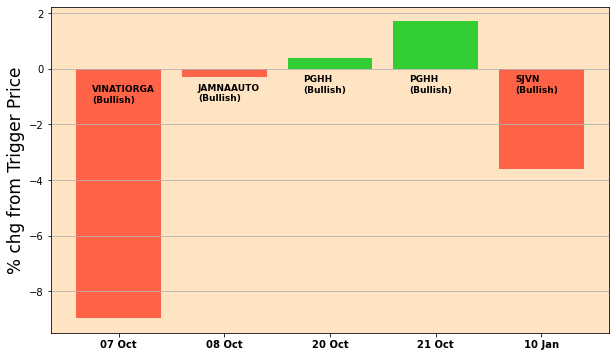

In [122]:
# STAGNANT chart
plt.figure(figsize=(10,6))
plt.bar(x= dates[::-1],
        height= list(stag.keys())[::-1],
        color = np.array(list(stag.values()))[:, -1][::-1])

for i,j in enumerate(list(stag.keys())[::-1]):
    text = f'{stag[j][0]}\n({stag[j][1]})'
    if stag[j][1]=='Bullish':
        c = 'black'
    else:
        c = 'indigo'
    plt.annotate(s=text, xy=(i-0.25, 0-len(text)*0.06), xycoords='data', fontsize=9, color=c, fontweight='bold')

plt.xticks(fontweight='bold')
plt.ylabel('% chg from Trigger Price', fontsize=17)
plt.grid(axis='y')

### Bullish v/s Bearish alerts

#### Bullish

In [123]:
# Total bullish alerts
bull = dfcn[dfcn.Type=='Bullish']
bull.shape
#Therefore no bearish alerts in Cash_N500

(55, 14)

In [124]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(34, 16)

In [125]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

5

In [126]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p, n

(2, 3)

In [127]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(35.0, 17.5)

In [128]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 66.67, 'SL Hit': 33.33}

Text(0, 0.5, '%')

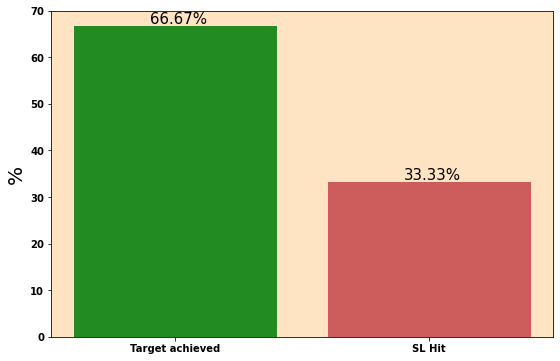

In [129]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [130]:
# No bearish alerts generated in Cash_N500 segement
bear = dfcn[dfcn.Type=='Bearish']
bear.shape

(0, 14)

## Monthly Analysis

In [131]:
dfm = dfcn.set_index('Date')

### October

In [132]:
# Total alerts in Oct
Oct = dfm.loc['2021-10-01':'2021-10-31']
Oct.shape

(26, 13)

#### Target achieved v/s SL Hit chart

In [133]:
# Total Target achieved and SL Hit alerts in Oct
TA = Oct[Oct['result dummy']=='Target achieved'].shape[0]
SL = Oct[Oct['result dummy']=='SL Hit'].shape[0]
TA, SL

(16, 6)

In [134]:
# Total stagnant alerts in Oct
Oct[Oct['result dummy']=='STAGNANT'].shape[0]

4

In [135]:
# (+)ive & (-)ive STAGNANT alerts
n1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']<Oct.Price)].shape[0]
p1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']>Oct.Price)].shape[0]

n2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']>Oct.Price)].shape[0]
p2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']<Oct.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 2)

In [136]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(17.0, 7.0)

In [137]:
octstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
octstat

{'Target achieved': 70.83, 'SL Hit': 29.17}

Text(0, 0.5, '%')

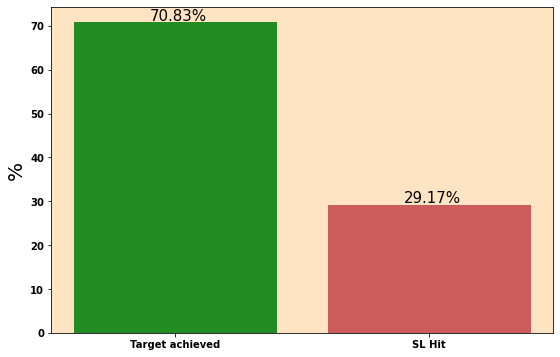

In [138]:
plt.figure(figsize=(9,6))
plt.bar(octstat.keys(), octstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(octstat):
    plt.annotate(f"{octstat[j]}%", xy=(i-0.1, octstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

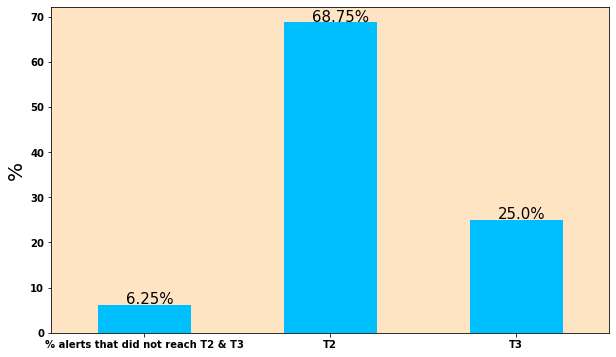

In [139]:
TAstat = Oct[Oct.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [140]:
octTAstat = TAstat

### November

In [141]:
# Total alerts in november
nov = dfm.loc['2021-11-01':'2021-11-30']
nov.shape

<ipython-input-141-70a14084d099>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  nov = dfm.loc['2021-11-01':'2021-11-30']


(17, 13)

#### Target achieved v/s SL Hit chart

In [142]:
# Total Target achieved and SL Hit alerts in november
TA = nov[nov['result dummy']=='Target achieved'].shape[0]
SL = nov[nov['result dummy']=='SL Hit'].shape[0]
TA, SL
# Therefore 0 STAGNANT alerts

(10, 7)

In [143]:
novstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
novstat

{'Target achieved': 58.82, 'SL Hit': 41.18}

Text(0, 0.5, '%')

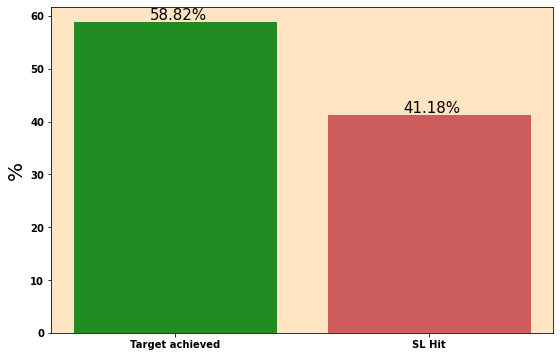

In [144]:
plt.figure(figsize=(9,6))
plt.bar(novstat.keys(), novstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(novstat):
    plt.annotate(f"{novstat[j]}%", xy=(i-0.1, novstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

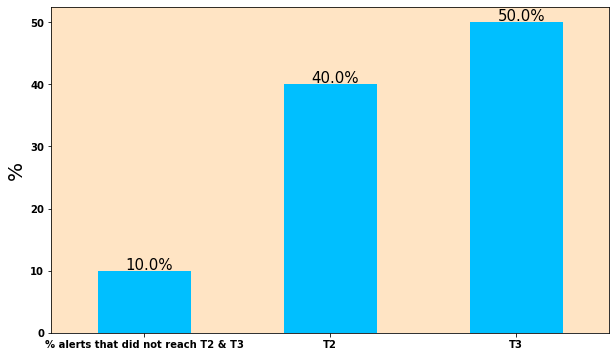

In [145]:
TAstat = nov[nov.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [146]:
novTAstat = TAstat

### Dec

In [147]:
# Total alerts in dec
dec = dfm.loc['2021-12-01':'2021-12-31']
dec.shape
# lol
# 1 alert (TTKPRESTIG, generated on 10 Dec) excluded because of 10/1 split on 14 Dec.

(4, 13)

#### Target achieved v/s SL Hit chart

In [148]:
# Total Target achieved and SL Hit alerts in dec
TA = dec[dec['result dummy']=='Target achieved'].shape[0]
SL = dec[dec['result dummy']=='SL Hit'].shape[0]
TA, SL
# Therefore 0 STAGNANT alerts

(3, 1)

In [149]:
decstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
decstat

{'Target achieved': 75.0, 'SL Hit': 25.0}

Text(0, 0.5, '%')

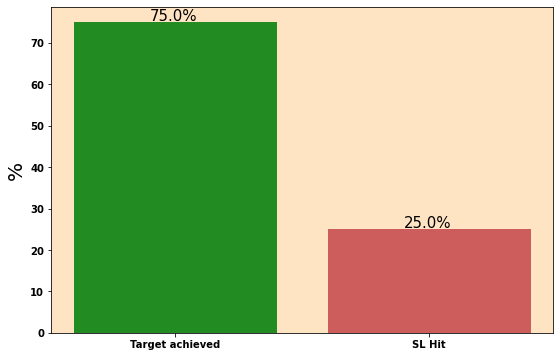

In [150]:
plt.figure(figsize=(9,6))
plt.bar(decstat.keys(), decstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(decstat):
    plt.annotate(f"{decstat[j]}%", xy=(i-0.1, decstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

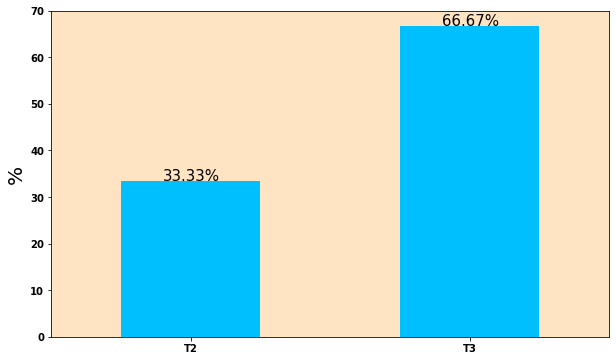

In [151]:
TAstat = dec[dec.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [152]:
decTAstat = TAstat
decTAstat['T1'] = 0.0
decTAstat = decTAstat.sort_index()

### Jan 

In [153]:
# Total alerts in jan
jan = dfm.loc['2022-01-01':'2022-01-31']
jan.shape 

<ipython-input-153-7b72fac54d89>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  jan = dfm.loc['2022-01-01':'2022-01-31']


(8, 13)

#### Target achieved v/s SL Hit chart

In [154]:
# Total Target achieved and SL Hit alerts in dec
TA = jan[jan['result dummy']=='Target achieved'].shape[0]
SL = jan[jan['result dummy']=='SL Hit'].shape[0]
TA, SL

(5, 2)

In [155]:
# Total stagnant alerts in Oct
jan[jan['result dummy']=='STAGNANT'].shape[0]

1

In [156]:
# (+)ive & (-)ive STAGNANT alerts
n1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']<jan.Price)].shape[0]
p1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']>jan.Price)].shape[0]

n2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']>jan.Price)].shape[0]
p2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']<jan.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [157]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(5.0, 2.5)

In [158]:
janstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
janstat

{'Target achieved': 66.67, 'SL Hit': 33.33}

Text(0, 0.5, '%')

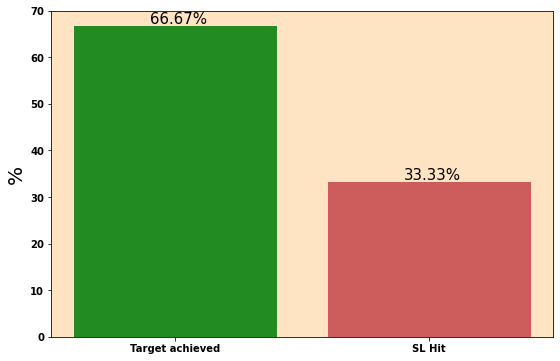

In [159]:
plt.figure(figsize=(9,6))
plt.bar(janstat.keys(), janstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(janstat):
    plt.annotate(f"{janstat[j]}%", xy=(i-0.1, janstat[j]+0.5), xycoords='data', fontsize=15)


plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

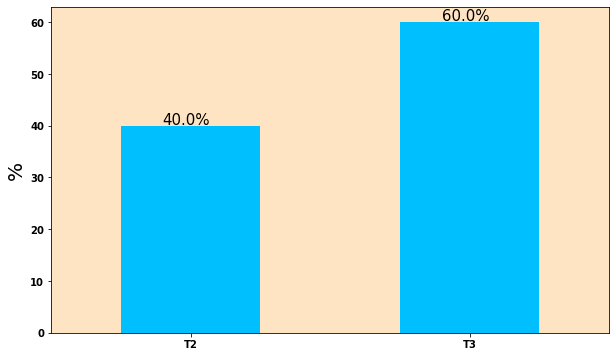

In [160]:
TAstat = jan[jan.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [161]:
TAstat['T1'] = 0.0
janTAstat = TAstat.sort_index()

### Line chart

In [162]:
line_data = list(zip(octstat.values(), novstat.values(), decstat.values(), janstat.values()))

In [163]:
mo_alerts = [Oct.shape[0], nov.shape[0], dec.shape[0], jan.shape[0]]
mo_alerts

[26, 17, 4, 8]

In [164]:
months = ['oct','nov','dec', 'jan']

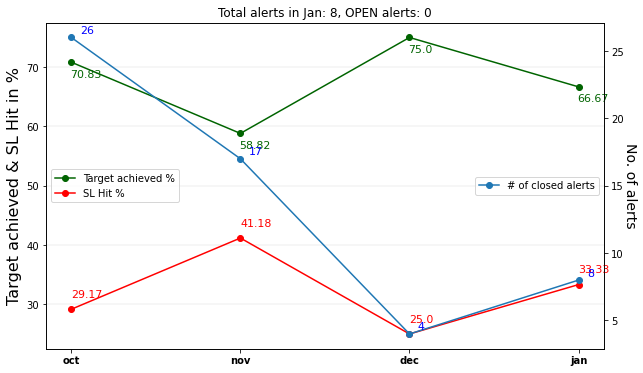

In [165]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.2)
##ax.set_ylim(0, 100)
ax.set_title(f'Total alerts in Jan: {jan.shape[0] + len(ons)}, OPEN alerts: {len(ons)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.007, j-2.5), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j+2), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target achieved & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, mo_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='right', facecolor='white')

for i,j in enumerate(mo_alerts):
    ax2.annotate(s=f'{j}', xy=(i+0.05, j+0.3), xycoords='data', fontsize=11, color='blue')

In [166]:
NC_TAdata = [octTAstat.to_list(), novTAstat.to_list(), decTAstat.to_list(), janTAstat.to_list()]

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

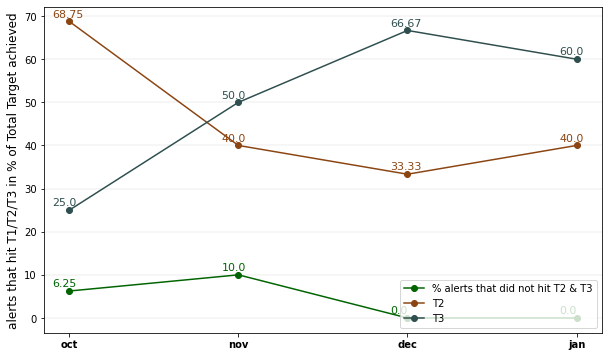

In [167]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, np.array(NC_TAdata)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(NC_TAdata)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(NC_TAdata)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.2)
##ax.set_ylim(0, 100)

for i,j in enumerate(np.array(NC_TAdata)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='lower right', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# FO & NCASH combined

In [168]:
df = pd.concat([dfcn, dfcf]).reset_index(drop=True).sort_values(by='Date', ascending=False)

In [169]:
df.shape # In actual: 459, since 4 ON alerts were removed from FO

(455, 14)

In [170]:
# Total bullish alerts
df[df.Type=='Bullish'].shape[0] # In actual: 370, since +3 were removed from FO

367

In [171]:
#Total bearish alerts
df[df.Type=='Bearish'].shape[0] # In actual: 89, since +1 were removed from FO as ON alerts

88

In [172]:
#Total stagnant alerts
df[df.Result=='STAGNANT'].shape[0]

17

In [173]:
# ON Alerts have already been removed
df[df.Result=='ON'].shape[0]

0

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [174]:
# Total Target achieved and SL Hit alerts
TA = df[df['result dummy']=='Target achieved'].shape[0]
SL = df[df['result dummy']=='SL Hit'].shape[0]
TA, SL

(314, 124)

In [175]:
# Total stagnant alerts
df[df['result dummy']=='STAGNANT'].shape[0]

17

In [176]:
# (+)ive & (-)ive STAGNANT alerts
n1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']<df.Price)].shape[0]
p1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']>df.Price)].shape[0]

n2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']>df.Price)].shape[0]
p2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']<df.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 15)

In [177]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(315.0, 131.5)

In [178]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 70.55, 'SL Hit': 29.45}

Text(0, 0.5, '%')

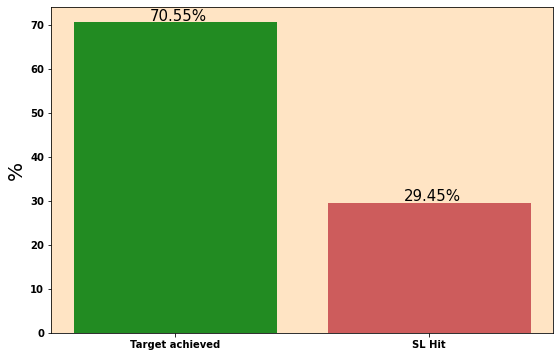

In [179]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

Text(0, 0.5, '%')

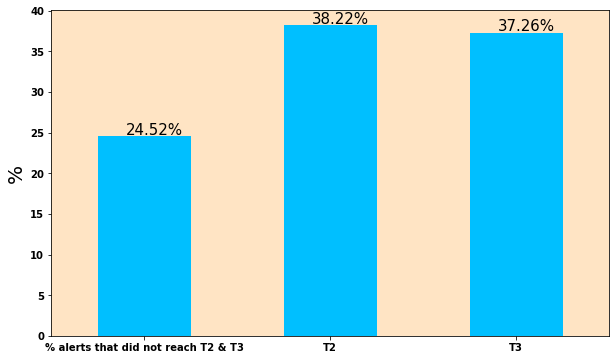

In [180]:
TAstat = df[df.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [181]:
# Avg no. of days needed to reach the highest target
df[df['result dummy']=='Target achieved'].NoD.mean()

5.792993630573249

### STAGNANT alert chart

In [182]:
stag = {}
for index, row in df[df['result dummy']=='STAGNANT'].iterrows():
    change = (row['15DayClose']-row['Price'])/row['Price'] * 100
    if row['Type'] == 'Bullish':
        if change>0:
            c = 'limegreen'
        else:
            c = 'tomato'
    else:
        if change<0:
            c= 'limegreen'
        else:
            c = 'tomato'
    
    stag[change] = (row['Stock'][:-3], row['Type'], c)

In [183]:
# preparing x-ticks
stag_date = df[df['result dummy']=='STAGNANT'].Date
dates = [date.strftime('%d %b') for date in stag_date]
dates[-5] = '27 Sept'
# dates[-6] = '27 sep'
dates

['10 Jan',
 '14 Dec',
 '02 Nov',
 '26 Oct',
 '21 Oct',
 '20 Oct',
 '14 Oct',
 '11 Oct',
 '08 Oct',
 '07 Oct',
 '06 Oct',
 '27 Sep',
 '27 Sept',
 '16 Sep',
 '08 Sep',
 '06 Sep',
 '11 Aug']

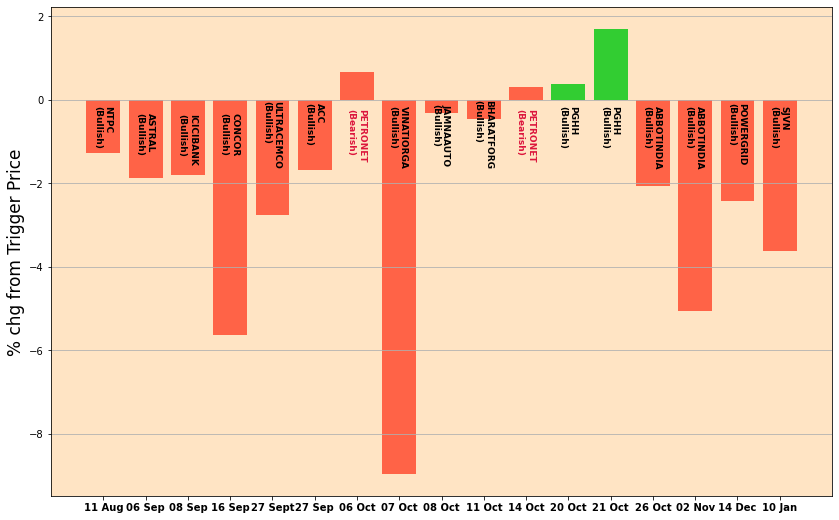

In [184]:
# STAGNANT chart
plt.figure(figsize=(14,9))
plt.bar(x= dates[::-1],
        height= list(stag.keys())[::-1],
        color = np.array(list(stag.values()))[:, -1][::-1])

for i,j in enumerate(list(stag.keys())[::-1]):
    text = f'{stag[j][0]}\n({stag[j][1]})'
    if stag[j][1]=='Bullish':
        c = 'black'
    else:
        c = 'crimson'

    plt.annotate(s=text, xy=(i-0.25, 0-len(text)*0.08), xycoords='data', rotation=-90, fontsize=9, color=c, fontweight='bold')

plt.xticks(fontweight='bold')
plt.ylabel('% chg from Trigger Price', fontsize=17)
plt.grid(axis='y')

### Bullish v/s Bearish alerts

#### Bullish

In [185]:
# Total bullish alerts
bull = df[df.Type=='Bullish']
bull.shape # In actual 370, +3 that were removed as ON alerts

(367, 14)

In [186]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(252, 100)

In [187]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

15

In [188]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(2, 13)

In [189]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(253.0, 106.5)

In [190]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 70.38, 'SL Hit': 29.62}

Text(0, 0.5, '%')

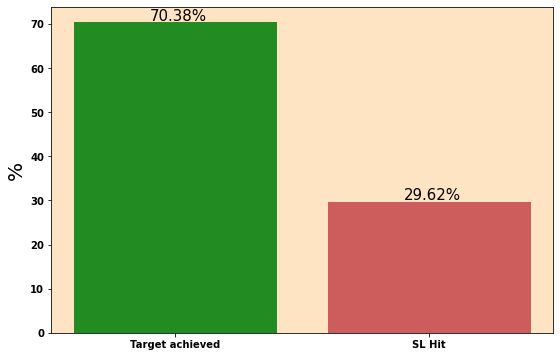

In [191]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [192]:
# Total bearish alerts
bear = df[df.Type=='Bearish']
bear.shape # In actual 89, +1 that were removed as ON alerts

(88, 14)

In [193]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(62, 24)

In [194]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [195]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [196]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(62.0, 25.0)

In [197]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.26, 'SL Hit': 28.74}

Text(0, 0.5, '%')

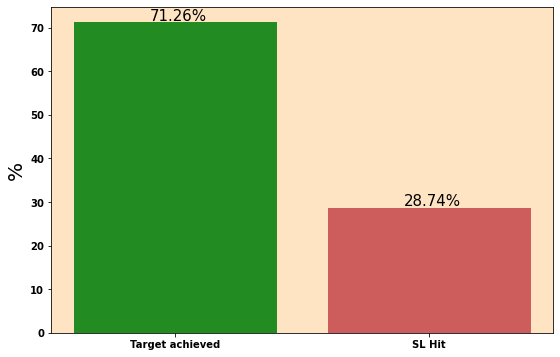

In [198]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [199]:
dfm = df.set_index('Date')

### July

#### Target achieved v/s SL Hit chart

In [200]:
# Total alerts in july
july = dfm.loc['2021-07-01':'2021-07-31']
july.shape

<ipython-input-200-854eef3c5dbe>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  july = dfm.loc['2021-07-01':'2021-07-31']


(21, 13)

In [201]:
# Total Target achieved and SL Hit alerts in july
TA = july[july['result dummy']=='Target achieved'].shape[0]
SL = july[july['result dummy']=='SL Hit'].shape[0]
TA, SL
# Therefore no STAGNANT alerts

(17, 4)

In [202]:
julystat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
julystat

{'Target achieved': 80.95, 'SL Hit': 19.05}

Text(0, 0.5, '%')

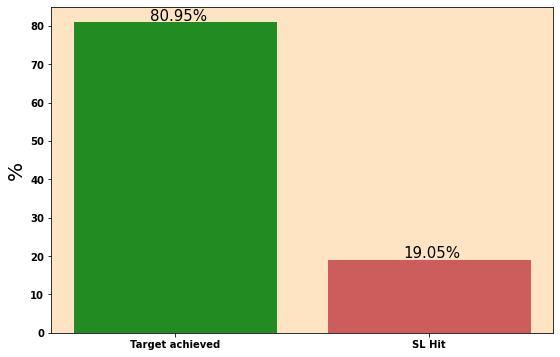

In [203]:
plt.figure(figsize=(9,6))
plt.bar(julystat.keys(), julystat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(julystat):
    plt.annotate(f"{julystat[j]}%", xy=(i-0.1, julystat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

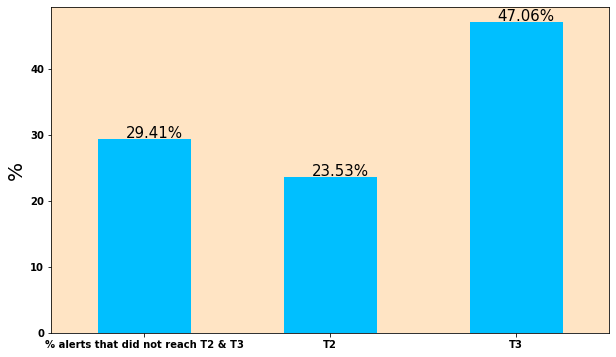

In [204]:
TAstat = july[july.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [205]:
julyTAstat = TAstat

### August

In [206]:
# Total alerts in august
aug = dfm.loc['2021-08-01':'2021-08-31']
aug.shape

<ipython-input-206-9ad5d03b3694>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  aug = dfm.loc['2021-08-01':'2021-08-31']


(81, 13)

#### Target achieved v/s SL Hit chart

In [207]:
# Total Target achieved and SL Hit alerts in august
TA = aug[aug['result dummy']=='Target achieved'].shape[0]
SL = aug[aug['result dummy']=='SL Hit'].shape[0]
TA, SL

(55, 25)

In [208]:
# Total stagnant alerts in august
aug[aug['result dummy']=='STAGNANT'].shape[0]

1

In [209]:
# (+)ive & (-)ive STAGNANT alerts
n1 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bullish') & (aug['15DayClose']<aug.Price)].shape[0]
p1 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bullish') & (aug['15DayClose']>aug.Price)].shape[0]

n2 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bearish') & (aug['15DayClose']>aug.Price)].shape[0]
p2 = aug[(aug['result dummy']=='STAGNANT') & (aug.Type=='Bearish') & (aug['15DayClose']<aug.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [210]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(55.0, 25.5)

In [211]:
augstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
augstat

{'Target achieved': 68.32, 'SL Hit': 31.68}

Text(0, 0.5, '%')

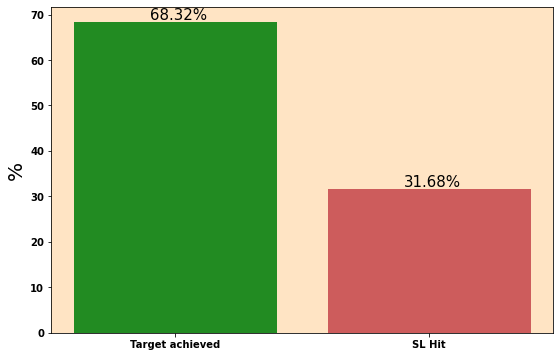

In [212]:
plt.figure(figsize=(9,6))
plt.bar(augstat.keys(), augstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(augstat):
    plt.annotate(f"{augstat[j]}%", xy=(i-0.1, augstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

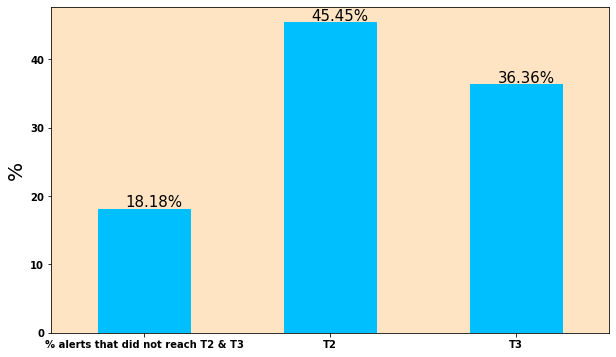

In [213]:
TAstat = aug[aug.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [214]:
augTAstat = TAstat

### September

In [215]:
# Total alerts in sept
sept = dfm.loc['2021-09-01':'2021-09-30']
sept.shape

(67, 13)

#### Target achieved v/s SL Hit chart

In [216]:
# Total Target achieved and SL Hit alerts in sept
TA = sept[sept['result dummy']=='Target achieved'].shape[0]
SL = sept[sept['result dummy']=='SL Hit'].shape[0]
TA, SL

(45, 17)

In [217]:
# Total stagnant alerts in sept
sept[sept['result dummy']=='STAGNANT'].shape[0]

5

In [218]:
# (+)ive & (-)ive STAGNANT alerts
n1 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bullish') & (sept['15DayClose']<sept.Price)].shape[0]
p1 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bullish') & (sept['15DayClose']>sept.Price)].shape[0]

n2 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bearish') & (sept['15DayClose']>sept.Price)].shape[0]
p2 = sept[(sept['result dummy']=='STAGNANT') & (sept.Type=='Bearish') & (sept['15DayClose']<sept.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 5)

In [219]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(45.0, 19.5)

In [220]:
septstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
septstat

{'Target achieved': 69.77, 'SL Hit': 30.23}

Text(0, 0.5, '%')

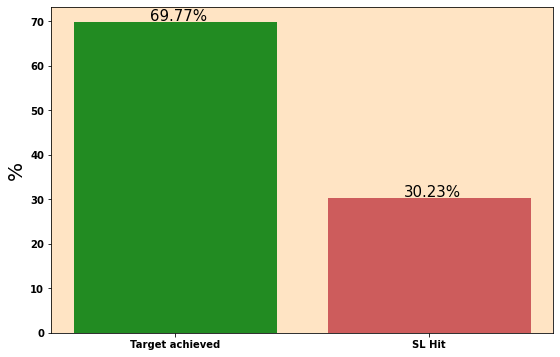

In [221]:
plt.figure(figsize=(9,6))
plt.bar(septstat.keys(), septstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(septstat):
    plt.annotate(f"{septstat[j]}%", xy=(i-0.1, septstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

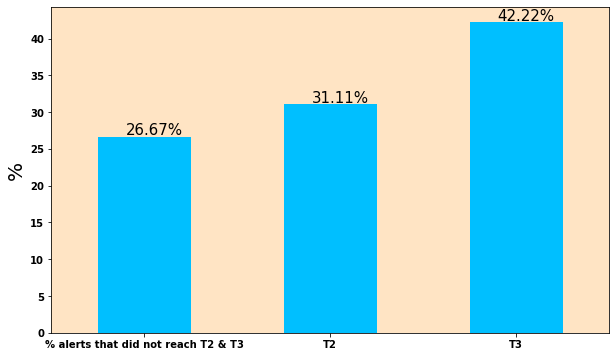

In [222]:
TAstat = sept[sept.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [223]:
septTAstat = TAstat

### October

In [224]:
# Total alerts in sept
Oct = dfm.loc['2021-10-01':'2021-10-31']
Oct.shape

(140, 13)

#### Target achieved v/s SL Hit chart

In [225]:
# Total Target achieved and SL Hit alerts in oct
TA = Oct[Oct['result dummy']=='Target achieved'].shape[0]
SL = Oct[Oct['result dummy']=='SL Hit'].shape[0]
TA, SL

(92, 40)

In [226]:
# Total stagnant alerts in oct
Oct[Oct['result dummy']=='STAGNANT'].shape[0]

8

In [227]:
# (+)ive & (-)ive STAGNANT alerts
n1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']<Oct.Price)].shape[0]
p1 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bullish') & (Oct['15DayClose']>Oct.Price)].shape[0]

n2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']>Oct.Price)].shape[0]
p2 = Oct[(Oct['result dummy']=='STAGNANT') & (Oct.Type=='Bearish') & (Oct['15DayClose']<Oct.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 6)

In [228]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(93.0, 43.0)

In [229]:
octstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
octstat

{'Target achieved': 68.38, 'SL Hit': 31.62}

Text(0, 0.5, '%')

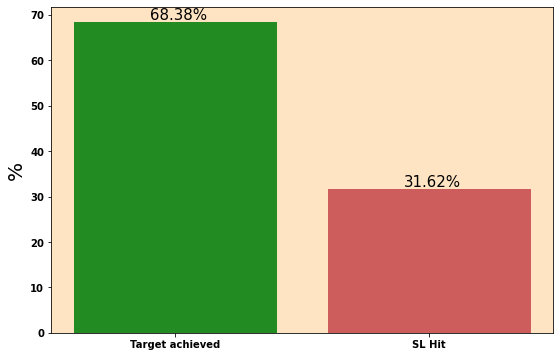

In [230]:
plt.figure(figsize=(9,6))
plt.bar(octstat.keys(), octstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(octstat):
    plt.annotate(f"{octstat[j]}%", xy=(i-0.1, octstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

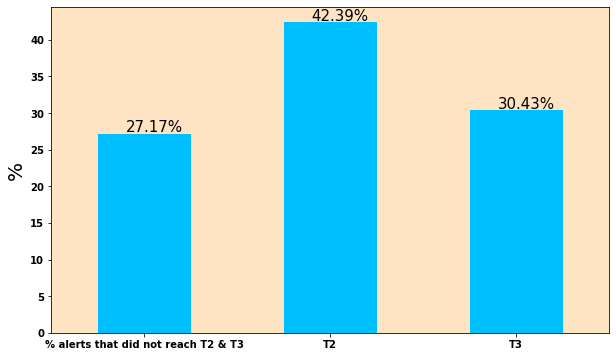

In [231]:
TAstat = Oct[Oct.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [232]:
octTAstat = TAstat

### November

In [233]:
# Total alerts in november
nov = dfm.loc['2021-11-01':'2021-11-30']
nov.shape

(74, 13)

#### Target achieved v/s SL Hit chart

In [234]:
# Total Target achieved and SL Hit alerts in november
TA = nov[nov['result dummy']=='Target achieved'].shape[0]
SL = nov[nov['result dummy']=='SL Hit'].shape[0]
TA, SL

(53, 20)

In [235]:
# Total stagnant alerts in novemebr
nov[nov['result dummy']=='STAGNANT'].shape[0]

1

In [236]:
# (+)ive & (-)ive STAGNANT alerts
n1 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bullish') & (nov['15DayClose']<nov.Price)].shape[0]
p1 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bullish') & (nov['15DayClose']>nov.Price)].shape[0]

n2 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bearish') & (nov['15DayClose']>nov.Price)].shape[0]
p2 = nov[(nov['result dummy']=='STAGNANT') & (nov.Type=='Bearish') & (nov['15DayClose']<nov.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [237]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(53.0, 20.5)

In [238]:
novstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
novstat

{'Target achieved': 72.11, 'SL Hit': 27.89}

Text(0, 0.5, '%')

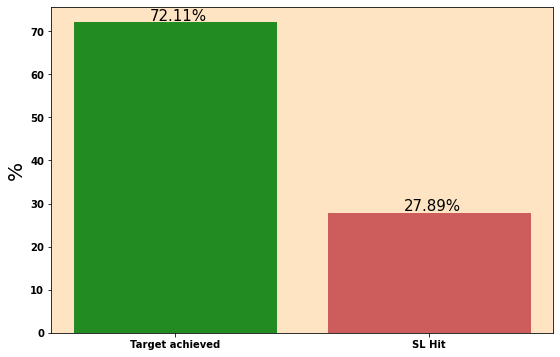

In [239]:
plt.figure(figsize=(9,6))
plt.bar(novstat.keys(), novstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(novstat):
    plt.annotate(f"{novstat[j]}%", xy=(i-0.1, novstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

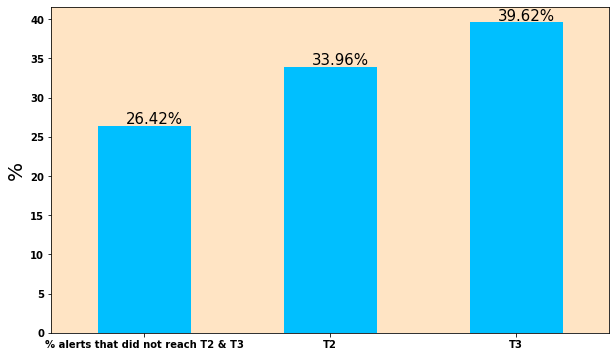

In [240]:
TAstat = nov[nov.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [241]:
novTAstat = TAstat

### Dec 

In [242]:
# Total alerts in dec up until 30 Dec
dec = dfm.loc['2021-12-01':'2021-12-31']
dec.shape 

(44, 13)

#### Target achieved v/s SL Hit chart

In [243]:
# Total Target achieved and SL Hit alerts in dec
TA = dec[dec['result dummy']=='Target achieved'].shape[0]
SL = dec[dec['result dummy']=='SL Hit'].shape[0]
TA, SL

(34, 9)

In [244]:
# Total stagnant alerts in dec
dec[dec['result dummy']=='STAGNANT'].shape[0]

1

In [245]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bullish') & (dec['15DayClose']<dec.Price)].shape[0]
p1 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bullish') & (dec['15DayClose']>dec.Price)].shape[0]

n2 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bearish') & (dec['15DayClose']>dec.Price)].shape[0]
p2 = dec[(dec['result dummy']=='STAGNANT') & (dec.Type=='Bearish') & (dec['15DayClose']<dec.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [246]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(34.0, 9.5)

In [247]:
decstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
decstat

{'Target achieved': 78.16, 'SL Hit': 21.84}

Text(0, 0.5, '%')

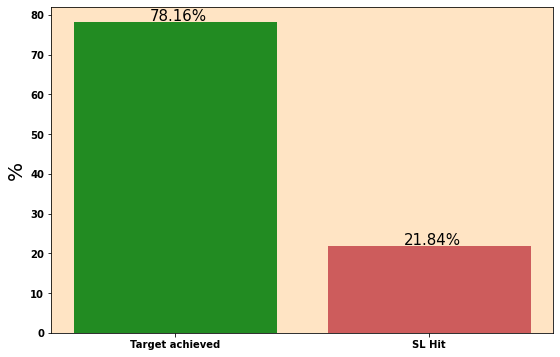

In [248]:
plt.figure(figsize=(9,6))
plt.bar(decstat.keys(), decstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(decstat):
    plt.annotate(f"{decstat[j]}%", xy=(i-0.1, decstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

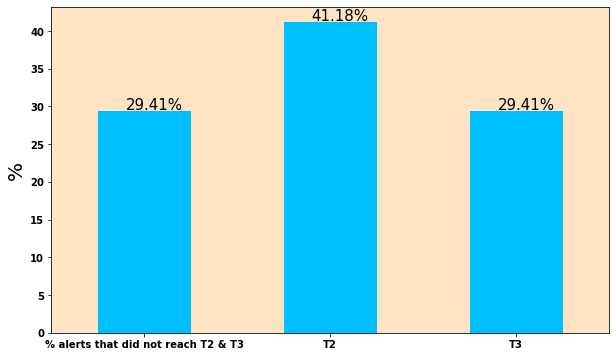

In [249]:
TAstat = dec[dec.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [250]:
decTAstat = TAstat

### Jan 

In [251]:
# Total alerts in jan 
jan = dfm.loc['2022-01-01':'2022-01-31']
jan.shape # In actual 32, +4 that were removed from FO as ON alerts

<ipython-input-251-cfc066b2f137>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  jan = dfm.loc['2022-01-01':'2022-01-31']


(28, 13)

#### Target achieved v/s SL Hit chart

In [252]:
# Total Target achieved and SL Hit alerts in dec
TA = jan[jan['result dummy']=='Target achieved'].shape[0]
SL = jan[jan['result dummy']=='SL Hit'].shape[0]
TA, SL

(18, 9)

In [253]:
# Total stagnant alerts in dec
jan[jan['result dummy']=='STAGNANT'].shape[0]

1

In [254]:
# (+)ive & (-)ive STAGNANT alerts
n1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']<jan.Price)].shape[0]
p1 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bullish') & (jan['15DayClose']>jan.Price)].shape[0]

n2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']>jan.Price)].shape[0]
p2 = jan[(jan['result dummy']=='STAGNANT') & (jan.Type=='Bearish') & (jan['15DayClose']<jan.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(0, 1)

In [255]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(18.0, 9.5)

In [256]:
janstat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
janstat

{'Target achieved': 65.45, 'SL Hit': 34.55}

Text(0, 0.5, '%')

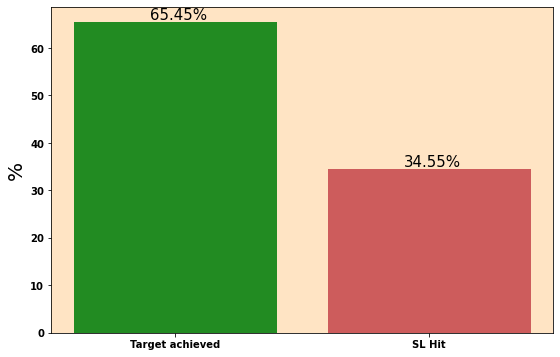

In [257]:
plt.figure(figsize=(9,6))
plt.bar(janstat.keys(), janstat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(janstat):
    plt.annotate(f"{janstat[j]}%", xy=(i-0.1, janstat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

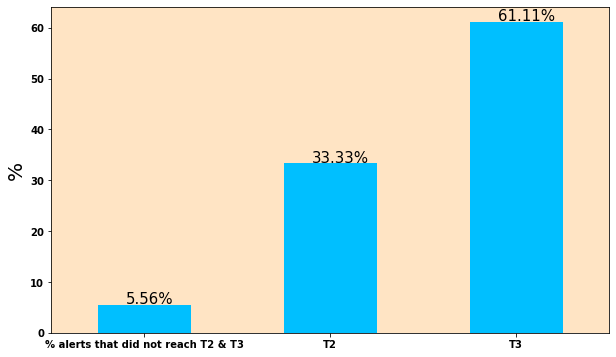

In [258]:
TAstat = jan[jan.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

In [259]:
janTAstat = TAstat

### Line chart

In [260]:
line_data = list(zip(julystat.values(), augstat.values(), septstat.values(), octstat.values(), novstat.values(), decstat.values(), janstat.values()))

In [261]:
mo_alerts = [july.shape[0], aug.shape[0], sept.shape[0], Oct.shape[0], nov.shape[0], dec.shape[0], jan.shape[0]]
mo_alerts

[21, 81, 67, 140, 74, 44, 28]

In [262]:
months = ['july','aug','sept','oct','nov','dec', 'jan']

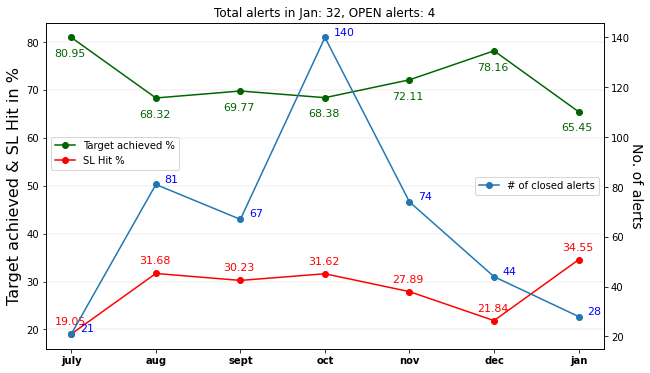

In [263]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.2)
#ax.set_ylim(0, 100)
ax.set_title('Total alerts in Jan: 32, OPEN alerts: 4')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.2, j-4), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.2, j+2), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', bbox_to_anchor=(0, 0.60), facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target achieved & SL Hit in %', fontsize=16)
# ax.set_xlim(-0.5, 6)

ax2 = ax.twinx()
ax2.plot(months, mo_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='right', facecolor='white')

for i,j in enumerate(mo_alerts):
    ax2.annotate(s=f'{j}', xy=(i+0.1, j+1), xycoords='data', fontsize=11, color='blue')

In [264]:
FN_TAdata = [julyTAstat, augTAstat, septTAstat, octTAstat, novTAstat, decTAstat, janTAstat]

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

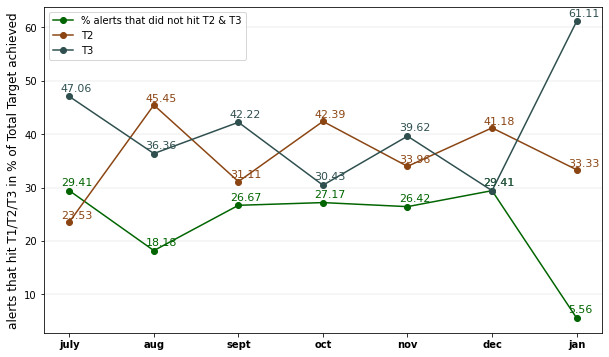

In [265]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, np.array(FN_TAdata)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(FN_TAdata)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(FN_TAdata)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.2)
##ax.set_ylim(0, 100)

for i,j in enumerate(np.array(FN_TAdata)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+0.7), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)